C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


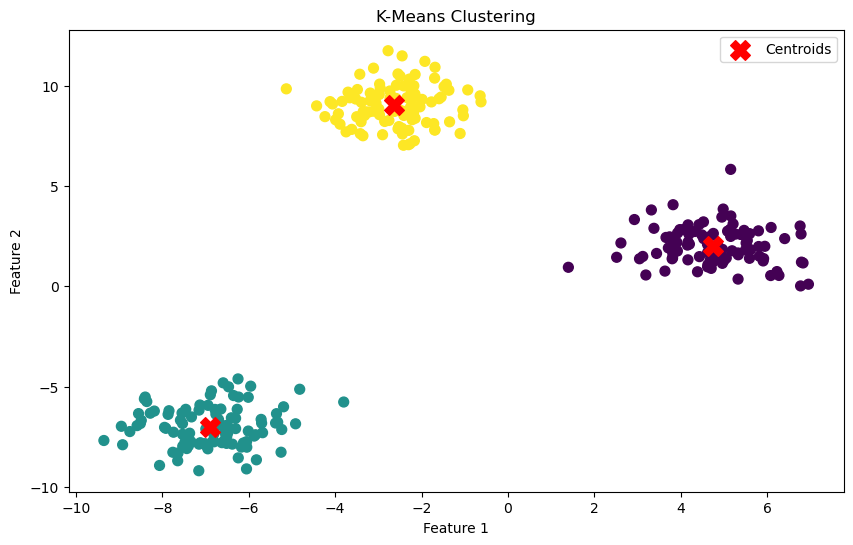

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 生成示例数据集
n_samples = 300
n_features = 2
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# 创建 K-Means 模型
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# 训练模型
kmeans.fit(X)

# 获取聚类标签和聚类中心
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

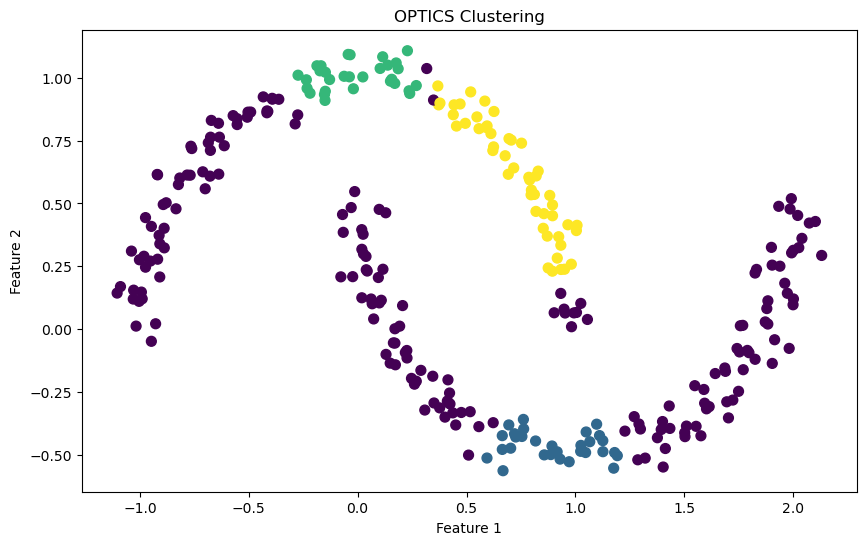

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.datasets import make_moons

# 生成示例数据集
n_samples = 300
X, y = make_moons(n_samples=n_samples, noise=0.05, random_state=42)

# 创建 OPTICS 模型
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)

# 训练模型
optics.fit(X)

# 获取聚类标签
labels = optics.labels_

# 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
    

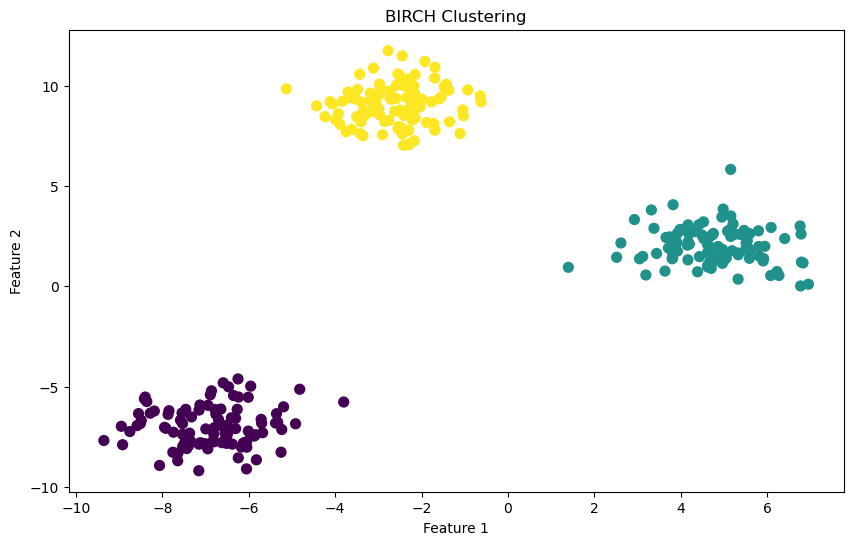

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs

# 生成示例数据集
n_samples = 300
n_features = 2
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# 创建 BIRCH 模型
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=n_clusters)

# 训练模型
birch.fit(X)

# 获取聚类标签
labels = birch.labels_

# 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

def em_gmm(X, K, max_iter=100, tol=1e-4):
    N, D = X.shape
    # 初始化参数
    pi = np.ones(K) / K
    mu = X[np.random.choice(N, K, replace=False)]
    sigma = [np.eye(D) for _ in range(K)]

    for _ in range(max_iter):
        # E 步骤
        gamma = np.zeros((N, K))
        for k in range(K):
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k])
        gamma = gamma / gamma.sum(axis=1, keepdims=True)

        # M 步骤
        N_k = gamma.sum(axis=0)
        pi = N_k / N
        for k in range(K):
            mu[k] = (gamma[:, k].reshape(-1, 1) * X).sum(axis=0) / N_k[k]
            diff = X - mu[k]
            sigma[k] = (gamma[:, k].reshape(-1, 1, 1) * diff[:, :, np.newaxis] * diff[:, np.newaxis, :]).sum(axis=0) / N_k[k]

        # 检查收敛
        if np.max(np.abs(pi)) < tol and np.max(np.abs(mu)) < tol and np.max(np.abs(sigma)) < tol:
            break

    return pi, mu, sigma

# 示例数据
np.random.seed(42)
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
X2 = np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], 100)
X = np.vstack((X1, X2))

# 运行 EM 算法
K = 2
pi, mu, sigma = em_gmm(X, K)
print("Weights:", pi)
print("Means:", mu)
print("Covariances:", sigma)

Weights: [0.07865163 0.92134837]
Means: [[2.99535386 0.62635696]
 [2.46459737 2.70200835]]
Covariances: [array([[9.40718229, 7.12122435],
       [7.12122435, 5.63111508]]), array([[7.61060925, 6.5777344 ],
       [6.5777344 , 6.99518373]])]
